<a href="https://colab.research.google.com/github/nazelahnm/PCVK_Genap_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


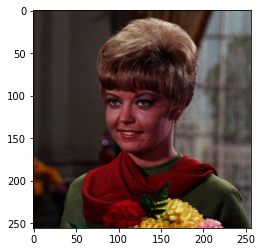

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

**MEMBUAT GAMMA COLLECTION**

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


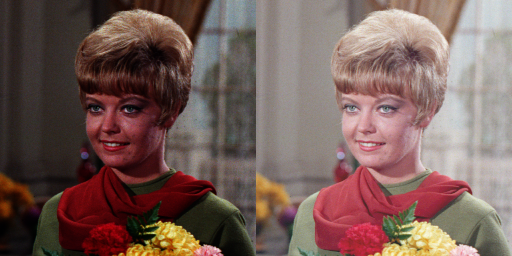

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

**MEMBUAT SIMULASI IMAGE DEPTH**

 Bit Depth pada Citra [STATIS]
---------------------------------


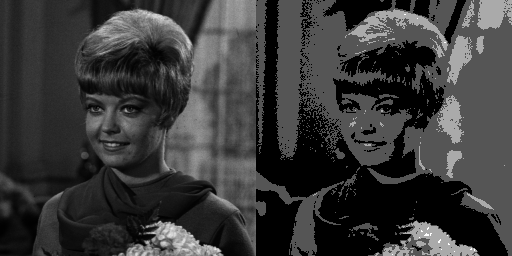

In [4]:
print(' Bit Depth pada Citra [STATIS]')
print('---------------------------------')

bit_depth=2
level = 255 / (pow(2,bit_depth)-1) 
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)

bit_depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel -> hanya 2 loop karena greyscale hanya 2 matriks
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
       bit_depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

**MEMBUAT MODUL AVERAGE DENOISING**

**nomer 3 (Jumlah Citra di Average 5)**

Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 5


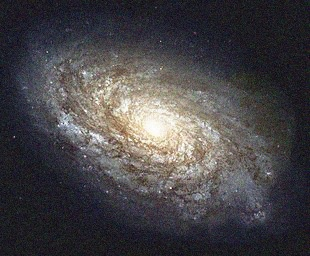

Nilai PSNR adalah 19.40802183506839 (dB)
Nilai MSE adalah 745.2091476814517


In [16]:
import glob
from math import log10, sqrt
import math
  
print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)


def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100, mse
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr, mse

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]
  
noised_image = noised_image / jumlah_citra
cv2_imshow(noised_image)

psnr, mse = PSNR(original_image, noised_image)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)

**nomer 3 (Jumlah Citra di Average 30)**

Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 30


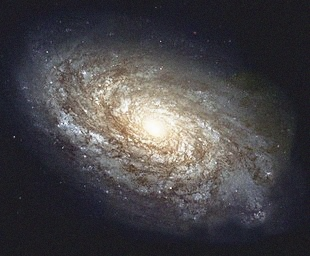

Nilai PSNR adalah 19.713646499426883 (dB)
Nilai MSE adalah 694.5695036962366


In [17]:
import glob
from math import log10, sqrt
import math
  
print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)


def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100, mse
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr, mse

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]
  
noised_image = noised_image / jumlah_citra
cv2_imshow(noised_image)

psnr, mse = PSNR(original_image, noised_image)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)

**nomer 3 (Jumlah Citra di Average 60)**

Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 60


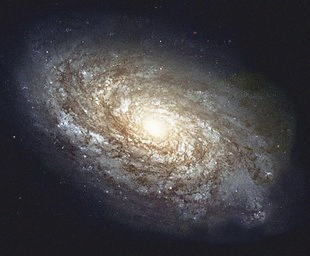

Nilai PSNR adalah 19.74498918532619 (dB)
Nilai MSE adalah 689.5748955836508


In [18]:
import glob
from math import log10, sqrt
import math
  
print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)


def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100, mse
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr, mse

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]
  
noised_image = noised_image / jumlah_citra
cv2_imshow(noised_image)

psnr, mse = PSNR(original_image, noised_image)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)

**nomer 3 (Jumlah Citra di Average 80)**

Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 80


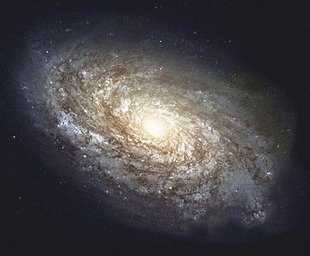

Nilai PSNR adalah 19.75358711510194 (dB)
Nilai MSE adalah 688.211062569567


In [19]:
import glob
from math import log10, sqrt
import math
  
print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)


def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100, mse
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr, mse

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]
  
noised_image = noised_image / jumlah_citra
cv2_imshow(noised_image)

psnr, mse = PSNR(original_image, noised_image)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)

**nomer 3 (Jumlah Citra di Average 100)**

Average Denoising Pada Citra
-------------------------------
Masukkan jumlah citra: 100


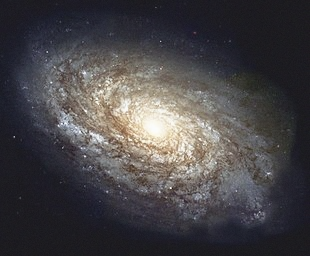

Nilai PSNR adalah 19.758317288501708 (dB)
Nilai MSE adalah 687.4618968229167


In [20]:
import glob
from math import log10, sqrt
import math
  
print('Average Denoising Pada Citra')
print('-------------------------------')

original_image = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)


def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100, mse
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr, mse

try:
  jumlah_citra = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

noised_image = np.zeros(cv_img[0].shape)
for i in range (jumlah_citra):
  noised_image = noised_image+cv_img[i]
  
noised_image = noised_image / jumlah_citra
cv2_imshow(noised_image)

psnr, mse = PSNR(original_image, noised_image)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)

**MEMBUAT IMAGE MASKING**

resolusi image : height x width  256  x  256


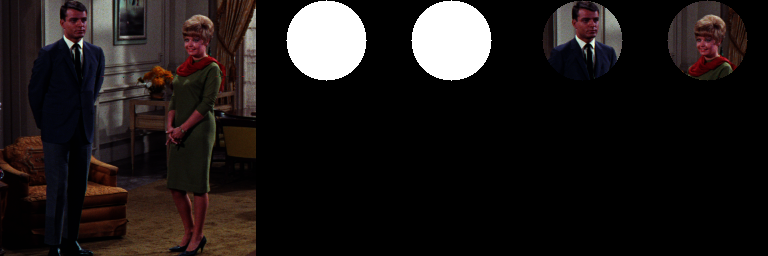

In [10]:
img_couple = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

height = img_couple.shape[0]
width = img_couple.shape[1]
print("resolusi image : height x width ", height, " x ",width)

mask = np.zeros(img_couple.shape, img_couple.dtype)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = img_couple & mask

mask1 = cv.circle(mask, (195, 40), 40, (255,255,255), -1)

result = img_couple & mask1

final_frame = cv.hconcat((img_couple, mask, result))
cv2_imshow(final_frame)

**PERCOBAAN MENGGUNAKAN OPERATOR LAIN**

In [11]:
#import gambar yang akan di gunakan terlebih dahulu
img_rose = cv.imread('/content/drive/MyDrive/PCVK/rose_pink.png')

**OR**

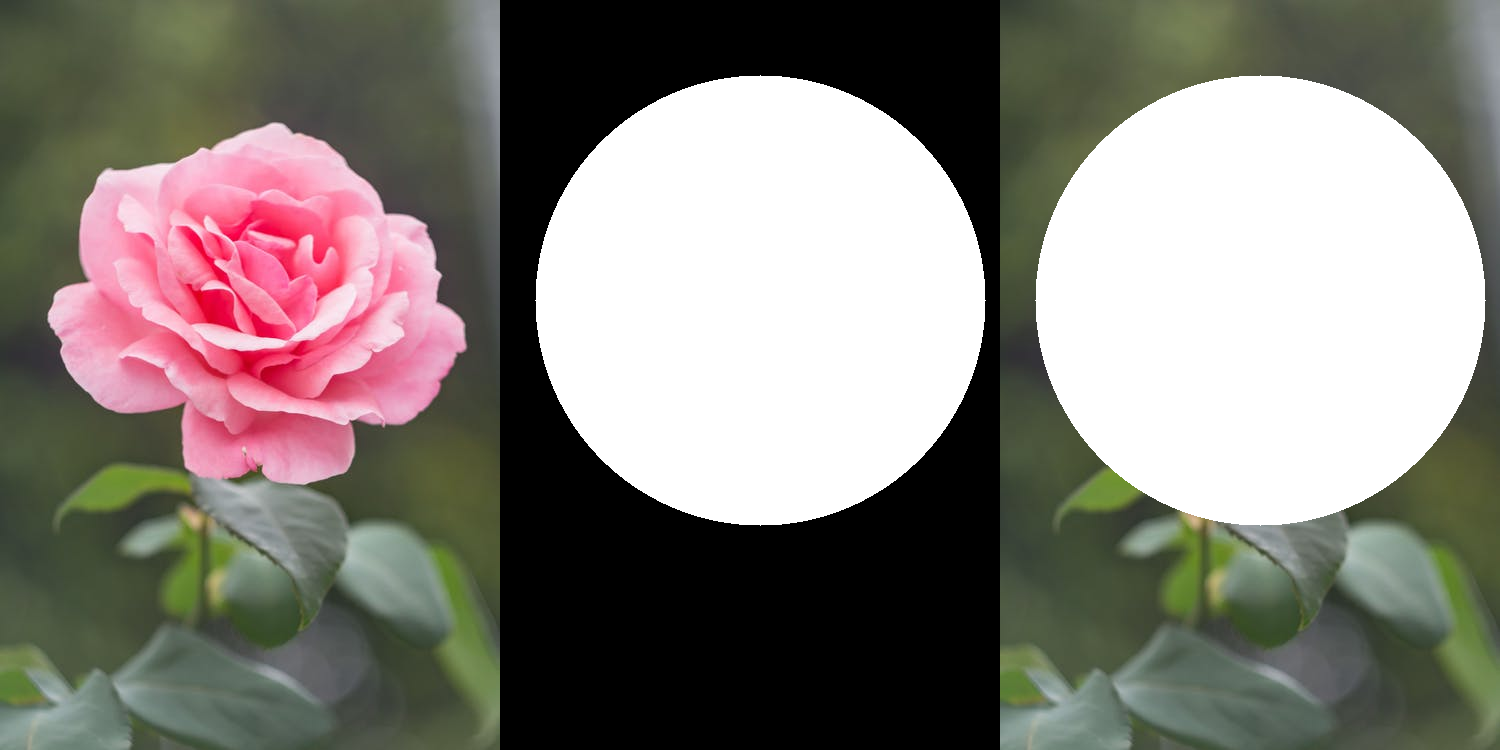

In [12]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

**NOT**

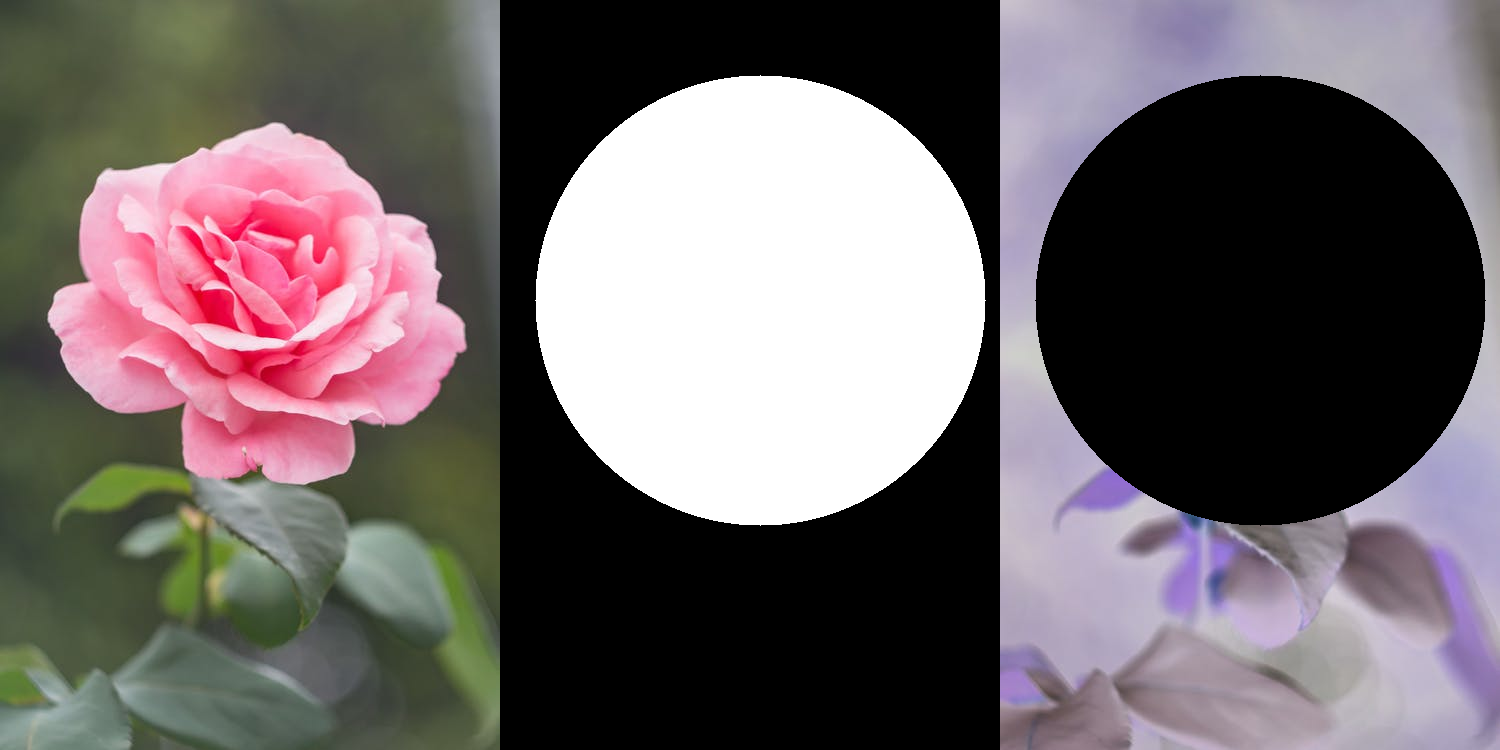

In [13]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

**NAND**

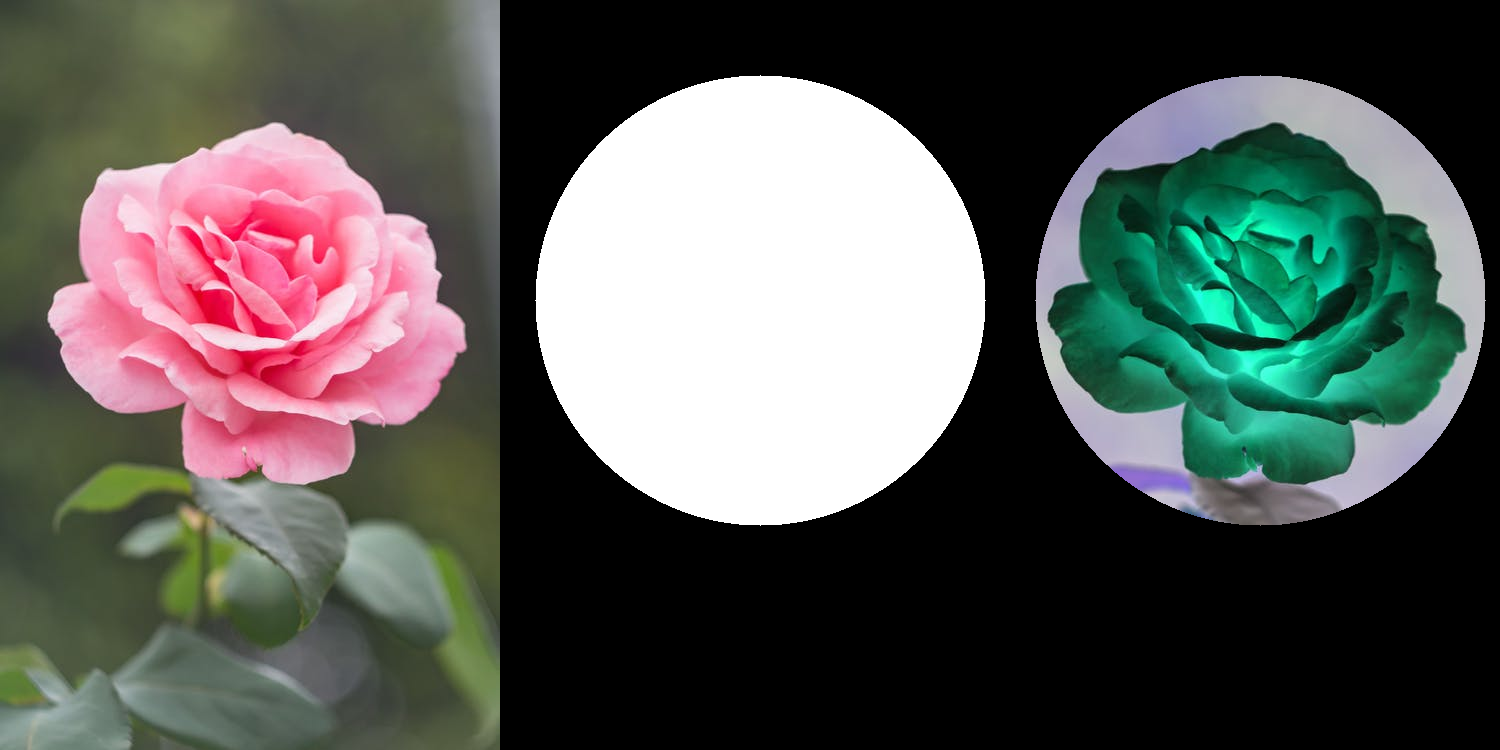

In [14]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

**XOR**

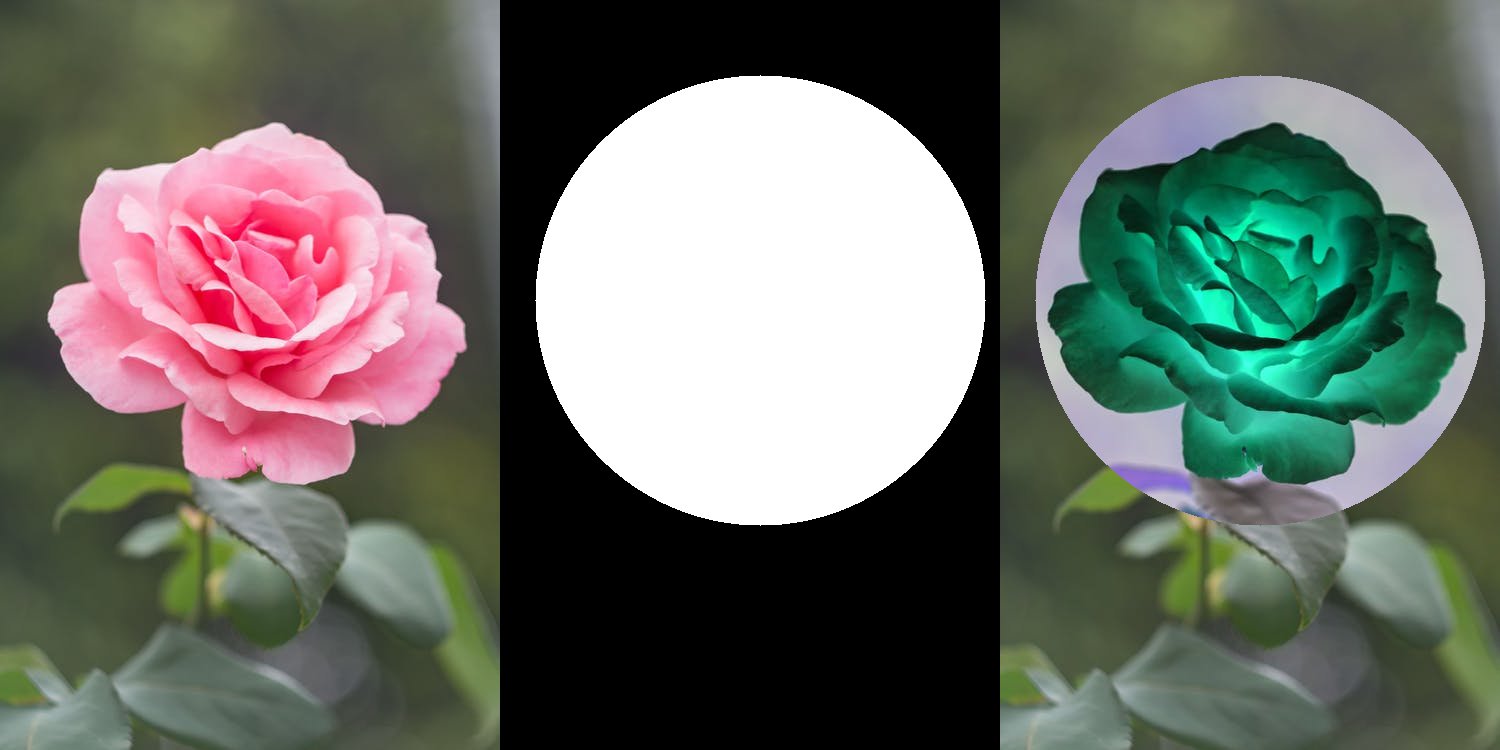

In [15]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)